# **Ensemble Stacking Algorithm using Combination of Machine Learning Algorithms for Diabetes Prediction and Classification Model**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [ ]:
#import the data
df = pd.read_csv("//content//diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
x=df.iloc[:,:-1].values
x


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y=df.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
ro=RandomOverSampler()
x_data,y_data=ro.fit_resample(x,y)

In [ ]:
# from imblearn.under_sampling import NearMiss
# from imblearn.over_sampling import SMOTE
# nm = NearMiss()
# smote = SMOTE()

In [ ]:
from collections import Counter
print("Actual Data:",Counter(y))
print("Artificial Data:",Counter(y_data))

Actual Data: Counter({0: 500, 1: 268})
Artificial Data: Counter({1: 500, 0: 500})


<ipython-input-578-1819b63546cb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"],kde=False)


<Axes: xlabel='Age'>

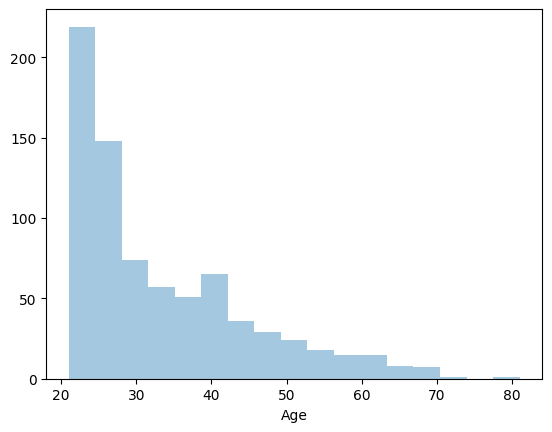

In [ ]:
sns.distplot(df["Age"],kde=False)
#most of the female patients are from the age group of 20-30

([<matplotlib.patches.Wedge at 0x7f0df920ae30>,
 [Text(-0.9801072140121813, -0.49938947630209485, 'Non - Diabetic'),
  Text(1.0246575908033213, 0.5220889020168246, 'Diabetic')],
 [Text(-0.5346039349157352, -0.2723942598011426, '65%'),
  Text(0.5791542904540511, 0.2950937272269008, '35%')])

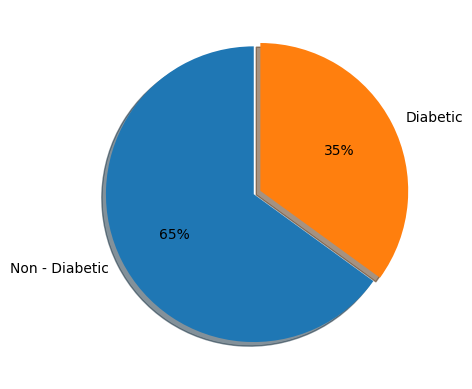

In [ ]:
labels = ('Non - Diabetic','Diabetic')
fracs = [65,35]
total = sum(fracs)
explode = (0, 0.05)
plt.pie(fracs, explode=explode, labels=labels, autopct=lambda p: '{:.0f}%'.format(p * total / 100), shadow=True, startangle=90)
#plt.title("Distribution of Diabetic and Non-diabetic patients")

In [ ]:
#Checking if any missing values are present in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

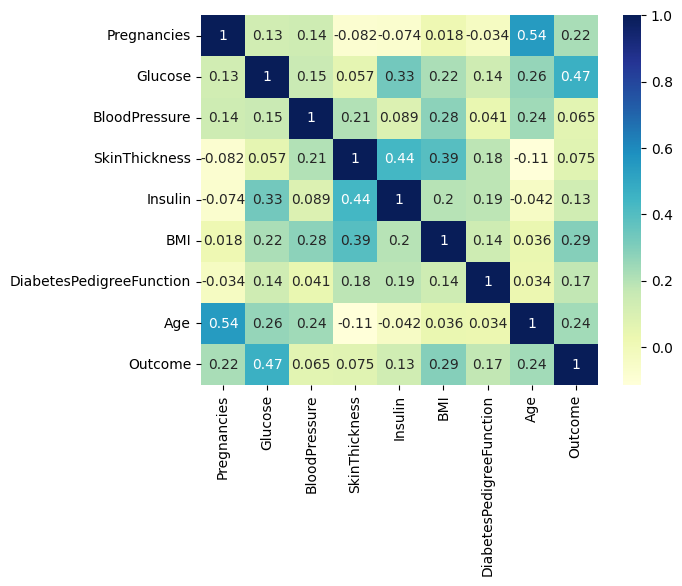

In [ ]:
#Checking correlation between the input features of the data
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

<Axes: xlabel='BMI', ylabel='SkinThickness'>

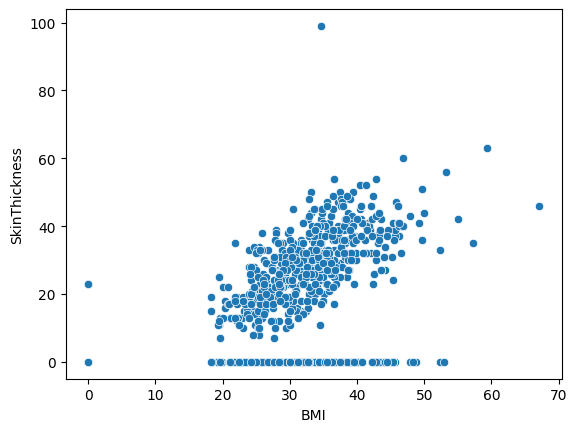

In [ ]:
#BMI and SkinThickness have some correlation
sns.scatterplot(x=df["BMI"],y=df["SkinThickness"])

In [ ]:
# X=df.drop(['Outcome'], axis=1)
# print(X)

In [ ]:
# y=df['Outcome']
# print(y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x= scaler.fit_transform(x)

In [ ]:
# Remove low variance features
# from sklearn.feature_selection import VarianceThreshold

# selection = VarianceThreshold(threshold=(0.1))
# X = selection.fit_transform(X)
# X.shape
# print(X)

# **Data Splitting**

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=100)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=10)

In [ ]:
X_train.shape, X_test.shape

((800, 8), (200, 8))

# **Building Classification models**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


**K nearest neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_scores = np.zeros(5)
accuracy_scores_train = np.zeros(5)
knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred)*100 # Calculate Accuracy
accuracy_scores_train[0] = knn_train_accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred)*100 # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted')*100 # Calculate F1-score
knn_train_recall = recall_score(y_train, y_train_pred)*100# Calculate recall

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred)*100 # Calculate Accuracy
accuracy_scores[0] = knn_test_accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred)*100 # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted')*100 # Calculate F1-score
knn_test_recall = recall_score(y_test, y_test_pred)*100# Calculate recall

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('- Recall: %s' % knn_train_recall)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)
print('- Recall: %s' % knn_test_recall)

Model performance for Training set
- Accuracy: 86.5
- MCC: 73.62599090397252
- F1 score: 86.46195420726971
- Recall: 92.6208651399491
----------------------------------
Model performance for Test set
- Accuracy: 72.0
- MCC: 43.568568372017246
- F1 score: 71.7778455904791
- Recall: 79.43925233644859


**Support vector machine (Radial basis function kernel)**

In [ ]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=2, C=1)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred)*100 # Calculate Accuracy
accuracy_scores_train[1] = svm_rbf_train_accuracy
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred)*100 # Calculate MCC
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted')*100 # Calculate F1-score
svm_rbf_train_recall = recall_score(y_train, y_train_pred)*100# Calculate recall

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred)*100 # Calculate Accuracy
accuracy_scores[1] = svm_rbf_test_accuracy
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred)*100 # Calculate MCC
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted')*100 # Calculate F1-score
svm_rbf_test_recall = recall_score(y_test, y_test_pred)*100# Calculate recall

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('- Recall: %s' % svm_rbf_train_recall)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)
print('- Recall: %s' % svm_rbf_test_recall)

Model performance for Training set
- Accuracy: 100.0
- MCC: 100.0
- F1 score: 100.0
- Recall: 100.0
----------------------------------
Model performance for Test set
- Accuracy: 84.0
- MCC: 72.21463335798389
- F1 score: 83.7677185200121
- Recall: 70.09345794392523


**Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred)*100 # Calculate Accuracy
accuracy_scores_train[2] = dt_train_accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred)*100 # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted')*100 # Calculate F1-score
dt_train_recall = recall_score(y_train, y_train_pred)*100# Calculate recall

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred)*100 # Calculate Accuracy
accuracy_scores[2] = dt_test_accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred)*100 # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted')*100 # Calculate F1-score
dt_test_recall = recall_score(y_test, y_test_pred)*100# Calculate recall

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('- Recall: %s' % dt_train_recall)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)
print('- Recall: %s' % dt_test_recall)

Model performance for Training set
- Accuracy: 83.375
- MCC: 67.04720958757348
- F1 score: 83.35589406137666
- Recall: 87.53180661577609
----------------------------------
Model performance for Test set
- Accuracy: 73.0
- MCC: 45.58370315403485
- F1 score: 72.83563311688312
- Recall: 79.43925233644859


**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred)*100 # Calculate Accuracy
accuracy_scores_train[3] =   rf_train_accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred)*100 # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted')*100 # Calculate F1-score
rf_train_recall = recall_score(y_train, y_train_pred)*100# Calculate recall

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred)*100 # Calculate Accuracy
accuracy_scores[3] =   rf_test_accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred)*100 # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted')*100 # Calculate F1-score
rf_test_recall = recall_score(y_test, y_test_pred)*100# Calculate recall

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('- Recall: %s' % rf_train_recall)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('- Recall: %s' % rf_test_recall)

Model performance for Training set
- Accuracy: 98.625
- MCC: 97.25616191106367
- F1 score: 98.62479578324648
- Recall: 97.96437659033079
----------------------------------
Model performance for Test set
- Accuracy: 82.5
- MCC: 64.78592214066782
- F1 score: 82.45805898231539
- Recall: 85.98130841121495


**Stacking Classifier**

In [ ]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

forest = RandomForestClassifier(n_estimators=10)
knn = knn = KNeighborsClassifier(3)
svm_rbf = SVC(gamma=2, C=1)
dt = DecisionTreeClassifier(max_depth=5)

lgclassifier = LogisticRegression(penalty='l2', random_state=100)

estimator_list = [
    ('dt',dt),
    ('rf',forest),
    ('knn',knn),
    ('svm_rbf',svm_rbf)]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list,
    final_estimator=lgclassifier,
    cv=20
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred)*100 # Calculate Accuracy
accuracy_scores_train[4] = stack_model_train_accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred)*100 # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')*100 # Calculate F1-score
stack_model_train_recall = recall_score(y_train, y_train_pred)*100# Calculate recall


# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred)*100 # Calculate Accuracy
accuracy_scores[4] = stack_model_test_accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred)*100 # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')*100 # Calculate F1-score
stack_model_test_recall = recall_score(y_test, y_test_pred)*100# Calculate recall

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('- Recall: %s' % stack_model_train_recall)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)
print('- Recall: %s' % stack_model_test_recall)

Model performance for Training set
- Accuracy: 100.0
- MCC: 100.0
- F1 score: 100.0
- Recall: 100.0
----------------------------------
Model performance for Test set
- Accuracy: 87.5
- MCC: 75.52556121842
- F1 score: 87.5103148208347
- Recall: 83.17757009345794


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

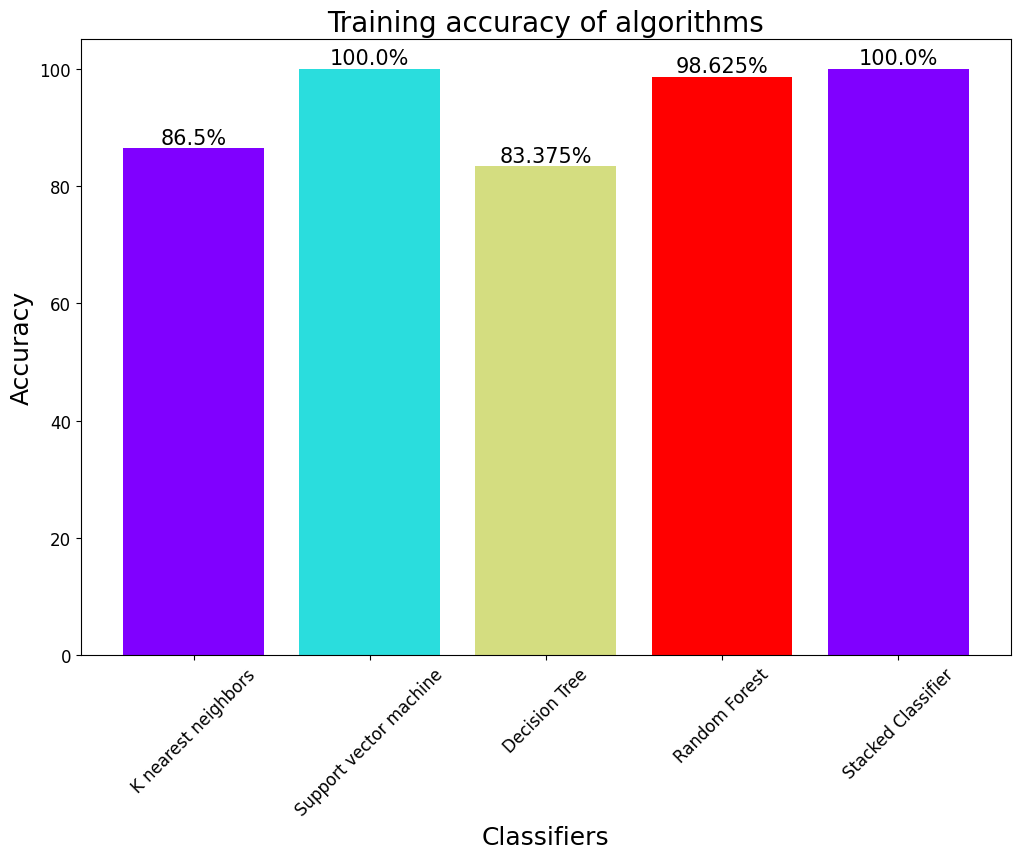

In [ ]:
plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['K nearest neighbors','Support vector machine','Decision Tree', 'Random Forest','Stacked Classifier']
p1 = plt.bar(labels,
        accuracy_scores_train,
        color = colors)
for i in p1:
    height = i.get_height()
    plt.annotate( "{}%".format(height),(i.get_x() + i.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)

plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Training accuracy of algorithms',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

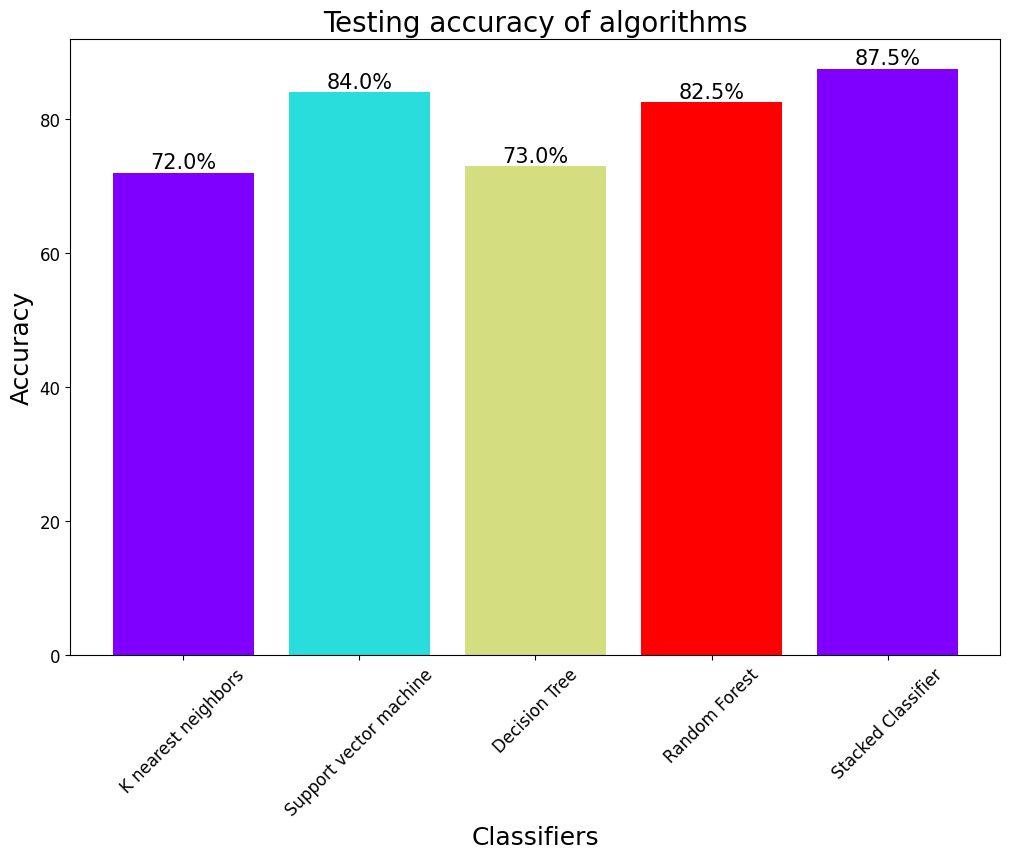

In [ ]:
plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['K nearest neighbors','Support vector machine','Decision Tree', 'Random Forest','Stacked Classifier']
p1 = plt.bar(labels,
        accuracy_scores,
        color = colors)

for i in p1:
    height = i.get_height()
    plt.annotate( "{}%".format(height),(i.get_x() + i.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)

plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Testing accuracy of algorithms',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

# **Comparison table of training performance parameters**

In [ ]:
acc_train_list = {'knn':knn_train_accuracy,
'svm_rbf': svm_rbf_train_accuracy,
'dt': dt_train_accuracy,
'rf': rf_train_accuracy,
'stack': stack_model_train_accuracy}

mcc_train_list = {'knn':knn_train_mcc,
'svm_rbf': svm_rbf_train_mcc,
'dt': dt_train_mcc,
'rf': rf_train_mcc,
'stack': stack_model_train_mcc}

f1_train_list = {'knn':knn_train_f1,
'svm_rbf': svm_rbf_train_f1,
'dt': dt_train_f1,
'rf': rf_train_f1,
'stack': stack_model_train_f1}

recall_train_list = {'knn':knn_train_recall,
'svm_rbf': svm_rbf_train_recall,
'dt': dt_train_recall,
'rf': rf_train_recall,
'stack': stack_model_train_recall}

acc_train_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_train_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_train_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
rc_train_df = pd.DataFrame.from_dict(recall_train_list, orient='index', columns=['Recall'])
df = pd.concat([acc_train_df, mcc_train_df, f1_train_df, rc_train_df], axis=1)
df

,Accuracy,MCC,F1,Recall
knn,86.500,73.625991,86.461954,92.620865
svm_rbf,100.000,100.000000,100.000000,100.000000
dt,83.375,67.047210,83.355894,87.531807
rf,98.625,97.256162,98.624796,97.964377
stack,100.000,100.000000,100.000000,100.000000


# **Comparison table of testing performance parameters**

In [ ]:
acc_test_list = {'knn':knn_test_accuracy,
'svm_rbf': svm_rbf_test_accuracy,
'dt': dt_test_accuracy,
'rf': rf_test_accuracy,
'stack': stack_model_test_accuracy}

mcc_test_list = {'knn':knn_test_mcc,
'svm_rbf': svm_rbf_test_mcc,
'dt': dt_test_mcc,
'rf': rf_test_mcc,
'stack': stack_model_test_mcc}

f1_test_list = {'knn':knn_test_f1,
'svm_rbf': svm_rbf_test_f1,
'dt': dt_test_f1,
'rf': rf_test_f1,
'stack': stack_model_test_f1}

recall_test_list = {'knn':knn_test_recall,
'svm_rbf': svm_rbf_test_recall,
'dt': dt_test_recall,
'rf': rf_test_recall,
'stack': stack_model_test_recall}

acc_test_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])
mcc_test_df = pd.DataFrame.from_dict(mcc_test_list, orient='index', columns=['MCC'])
f1_test_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1'])
rc_test_df = pd.DataFrame.from_dict(recall_test_list, orient='index', columns=['Recall'])
df = pd.concat([acc_test_df, mcc_test_df, f1_test_df, rc_test_df], axis=1)
df

,Accuracy,MCC,F1,Recall
knn,72.0,43.568568,71.777846,79.439252
svm_rbf,84.0,72.214633,83.767719,70.093458
dt,73.0,45.583703,72.835633,79.439252
rf,82.5,64.785922,82.458059,85.981308
stack,87.5,75.525561,87.510315,83.177570
